In [35]:
import urllib3
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
from math import radians

In [17]:
http = urllib3.PoolManager()
resp = http.request("GET", "http://api.open-notify.org/iss-now.json")
print(resp.data)
print(type(resp.data))

b'{"message": "success", "iss_position": {"latitude": "-0.2670", "longitude": "70.4714"}, "timestamp": 1643737248}'
<class 'bytes'>


In [18]:
json_file = resp.data.decode('utf8').replace("'", '"')
print(json_file)
print(type(json_file))
print("- "*30)

# Load the JSON to a Python list & dump it back out as formatted JSON
data = json.loads(json_file)
s = json.dumps(data, indent=4, sort_keys=True)
print(s)
print(data)

{"message": "success", "iss_position": {"latitude": "-0.2670", "longitude": "70.4714"}, "timestamp": 1643737248}
<class 'str'>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
{
    "iss_position": {
        "latitude": "-0.2670",
        "longitude": "70.4714"
    },
    "message": "success",
    "timestamp": 1643737248
}
{'message': 'success', 'iss_position': {'latitude': '-0.2670', 'longitude': '70.4714'}, 'timestamp': 1643737248}


In [19]:
import pickle

class MyClass():
    def __init__(self, param):
        self.param = param

def save_object(obj):
    try:
        with open("data.pickle", "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported)", ex)
 
def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [16]:
http = urllib3.PoolManager()
latitudeTL = []
longitudeTL = []
data_file_lat = ['1st_lat.pickle', '2nd_lat.pickle', '3rd_lat.pickle', '4th_lat.pickle', '5th_lat.pickle', '6th_lat.pickle']
data_file_lon = ['1st_lon.pickle', '2nd_lon.pickle', '3rd_lon.pickle', '4th_lon.pickle', '5th_lon.pickle', '6th_lon.pickle']
file_index =0

while True:
    resp = http.request("GET", "http://api.open-notify.org/iss-now.json")
    json_file = resp.data.decode('utf8').replace("'", '"')
    data = json.loads(json_file)

    lat_now = float(data['iss_position']['latitude'])
    lon_now = float(data['iss_position']['longitude'])
    latitudeTL.append(lat_now)
    longitudeTL.append(lon_now)
    time.sleep(60)
    # print(lat_now)

    if len(latitudeTL)%120 == 0:
        obj_file_lat = MyClass(latitudeTL)
        obj_file_lon = MyClass(longitudeTL)
        try:
            with open(data_file_lat[file_index], "wb") as f1:
                pickle.dump(obj_file_lat, f1, protocol=pickle.HIGHEST_PROTOCOL)
        except Exception as ex:
            print("Error during pickling object (Possibly unsupported):", ex)

        try:
            with open(data_file_lon[file_index], "wb") as f2:
                pickle.dump(obj_file_lon, f2, protocol=pickle.HIGHEST_PROTOCOL)
        except Exception as ex:
            print("Error during pickling object (Possibly unsupported):", ex)

        latitudeTL = []
        longitudeTL = []
        file_index +=1

        if file_index ==6:
            break
    

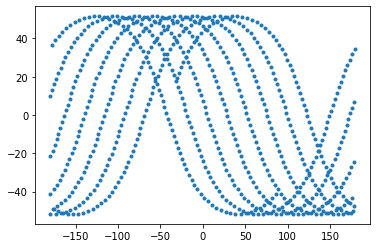

In [36]:
lat1 = load_object("1st_lat.pickle")
lon1 = load_object("1st_lon.pickle")
lat2 = load_object("2nd_lat.pickle")
lon2 = load_object("2nd_lon.pickle")
lat3 = load_object("3rd_lat.pickle")
lon3 = load_object("3rd_lon.pickle")
lat4 = load_object("4th_lat.pickle")
lon4 = load_object("4th_lon.pickle")
lat5 = load_object("5th_lat.pickle")
lon5 = load_object("5th_lon.pickle")
lat6 = load_object("6th_lat.pickle")
lon6 = load_object("6th_lon.pickle")
all_lat = lat1.param + lat2.param + lat3.param + lat4.param + lat5.param + lat6.param
all_lon = lon1.param + lon2.param + lon3.param + lon4.param + lon5.param + lon6.param
plt.plot(all_lon, all_lat, '.')
plt.show()

Text(0, 0.5, 'latitude')

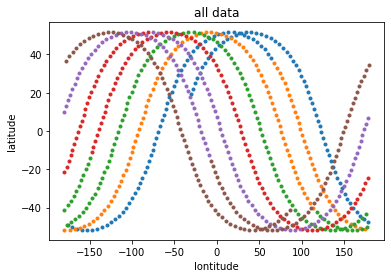

In [21]:
plt.plot(lon1.param, lat1.param, '.')
plt.plot(lon2.param, lat2.param, '.')
plt.plot(lon3.param, lat3.param, '.')
plt.plot(lon4.param, lat4.param, '.')
plt.plot(lon5.param, lat5.param, '.')
plt.plot(lon6.param, lat6.param, '.')
plt.title('all data')
plt.xlabel('lontitude')
plt.ylabel('latitude')

Text(0, 0.5, 'latitude')

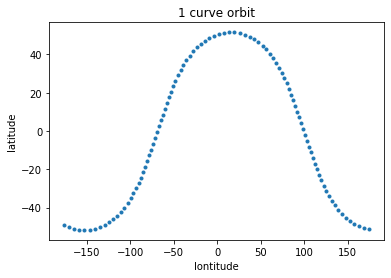

In [22]:
one_orbit_iss_lat = []
one_orbit_iss_lon = []
one_orbit_iss_lat = one_orbit_iss_lat + lat1.param[59:] + lat2.param[0:35]
one_orbit_iss_lon = one_orbit_iss_lon + lon1.param[59:] + lon2.param[0:35]

plt.plot(one_orbit_iss_lon, one_orbit_iss_lat, '.')
plt.title('1 curve orbit')
plt.xlabel('lontitude')
plt.ylabel('latitude')

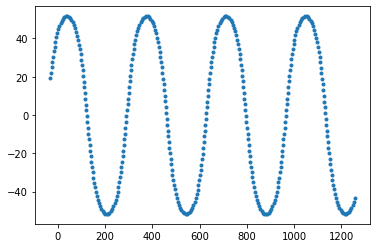

In [37]:
iss_lat = []
iss_lon = []

# first
one_lat = lat1.param[0:59]
one_lon = lon1.param[0:59]

# second
two_lat = lat1.param[59:]
two_lon = lon1.param[59:]
for i in range(len(two_lon)): two_lon[i] +=360

# third
three_lat = lat2.param[0:35]
three_lon = lon2.param[0:35]
for i in range(len(three_lon)): three_lon[i] += 360

# four
four_lat = lat2.param[35:]
four_lon = lon2.param[35:]
for i in range(len(four_lon)): four_lon[i] +=720

# five
five_lat = lat3.param[:12]
five_lon = lon3.param[:12]
for i in range(len(five_lon)): five_lon[i] +=720

# six
six_lat = lat3.param[12:109]
six_lon = lon3.param[12:109]
for i in range(len(six_lon)): six_lon[i] +=1080

iss_lat = one_lat + two_lat + three_lat + four_lat + five_lat + six_lat
iss_lon = one_lon + two_lon + three_lon + four_lon + five_lon + six_lon

plt.plot(iss_lon, iss_lat, '.')


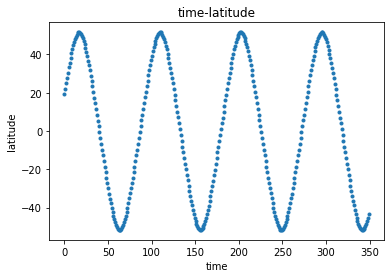

In [38]:
t_x = np.linspace(0, 349, 349)
plt.plot(t_x, iss_lat, '.')
plt.title('time-latitude')
plt.xlabel('time')
plt.ylabel('latitude')
plt.show()

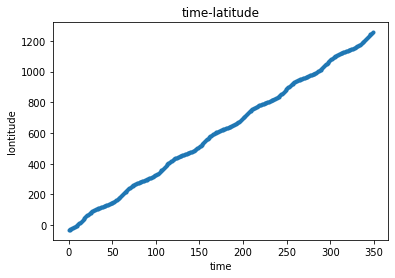

In [39]:
t_x = np.linspace(0, 349, 349)
plt.plot(t_x, iss_lon, '.')
plt.title('time-latitude')
plt.xlabel('time')
plt.ylabel('lontitude')
plt.show()

In [44]:
def dg2rd():
    return np.pi/180

def data():
    lat1 = load_object("1st_lat.pickle")
    lon1 = load_object("1st_lon.pickle")
    lat2 = load_object("2nd_lat.pickle")
    lon2 = load_object("2nd_lon.pickle")

    # first
    one_lat = lat1.param[0:59]
    one_lon = lon1.param[0:59]

    # second
    two_lat = lat1.param[59:]
    two_lon = lon1.param[59:]
    for i in range(len(two_lon)): two_lon[i] +=360

    # third
    three_lat = lat2.param[0:35]
    three_lon = lon2.param[0:35]
    for i in range(len(three_lon)): three_lon[i] += 360

    # four
    four_lat = lat2.param[35:]
    four_lon = lon2.param[35:]
    for i in range(len(four_lon)): four_lon[i] +=720

    iss_lat = np.array(one_lat + two_lat + three_lat + four_lat)
    iss_lon = np.array(one_lon + two_lon + three_lon + four_lon)

    return iss_lon, iss_lat

def chisq_sin(p, x, y):
    """ 
    Calculate sum((y-y_model)^2) , y_model = a*sin(b*x)
    
    x, y are data points, p contains a, b, c
    p is first input as required by minimize
    """

    y_model = p[0]*np.sin(p[1]*dg2rd()*x + p[2]) + p[3]
    chisq = np.sum((y - y_model)**2)
    return chisq

def fit_sin_data1():
    """ Fit straight line to the data """

    x, y = data()

    # Initial guess for p
    p0 = [1.0, 1.0, 1.0, 1.0]

    """
    Minimization of scalar function of one or more variables.
    scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

    fun  : The objective function to be minimized
    x0   : Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
    args : Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

    """

    # Call minimize for fitting
    fit_result = minimize(chisq_sin, p0, args=(x, y))
    p_best = fit_result.x
    print(p_best)

    # Calculate best fit value of y
    y_best = p_best[0]*np.sin(p_best[1]*dg2rd()*x + p_best[2]) + p_best[3]

    # Show results
    plt.plot(x, y, '.b', label='data point')
    plt.plot(x, y_best, '-g', label='non-linear least square')
    plt.legend(loc="best")
    plt.show()

[5.71756095e+01 1.06960339e+00 8.52707152e-01 4.88544727e-04]


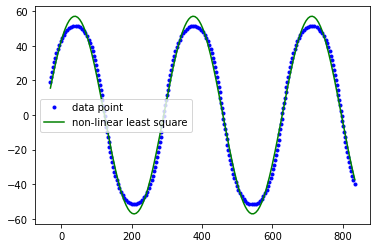

In [45]:
fit_sin_data1() # y_model = a*sin(bx+ c) +d

In [30]:
def data_lat():
    iss_lat = []
    iss_lon = []

    # first
    one_lat = lat1.param[0:59]

    # second
    two_lat = lat1.param[59:]

    # third
    three_lat = lat2.param[0:35]

    # four
    four_lat = lat2.param[35:]

    # five
    five_lat = lat3.param[:12]

    # six
    six_lat = lat3.param[12:109]

    iss_lat = np.array(one_lat + two_lat + three_lat + four_lat)
    x = np.linspace(0, len(iss_lat), len(iss_lat))
    return x, iss_lat

def fit_sin_data1():
    """ Fit straight line to the data """

    x, y = data_lat()

    # Initial guess for p
    p0 = [1.0, 1.0]

    """
    Minimization of scalar function of one or more variables.
    scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

    fun  : The objective function to be minimized
    x0   : Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
    args : Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

    """

    # Call minimize for fitting
    fit_result = minimize(chisq_sin, p0, args=(x, y))
    p_best = fit_result.x
    print(p_best)

    # Calculate best fit value of y
    y_best = p_best[0]*np.sin(p_best[1]*dg2rd()*x)

    # Show results
    plt.plot(x, y, '.b', label='data point')
    plt.plot(x, y_best, '-g', label='non-linear least square')
    plt.legend(loc="best")
    plt.show()

[-22.58251139   3.62771641]


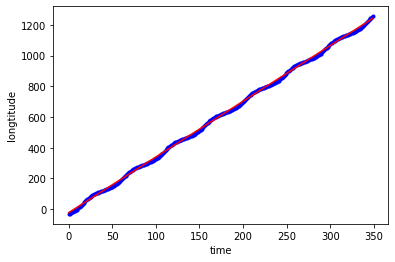

In [32]:
def data_lon():
    iss_lon = []

    one_lon = lon1.param[0:59]

    two_lon = lon1.param[59:]
    for i in range(len(two_lon)): two_lon[i] +=360

    three_lon = lon2.param[0:35]
    for i in range(len(three_lon)): three_lon[i] += 360

    four_lon = lon2.param[35:]
    for i in range(len(four_lon)): four_lon[i] +=720

    five_lon = lon3.param[:12]
    for i in range(len(five_lon)): five_lon[i] +=720

    six_lon = lon3.param[12:109]
    for i in range(len(six_lon)): six_lon[i] +=1080

    iss_lon = np.array(one_lon + two_lon + three_lon + four_lon + five_lon + six_lon)

    x = np.linspace(0, len(iss_lon), len(iss_lon))

    return x, iss_lon

def chisq_linear(p, x, y):
    """ 
    Calculate sum((y-y_model)^2) , y_model = mx+c
    
    x, y are data points, p contains m and c
    p is first input as required by minimize
    """

    # p[0] is intercept, p[1] is slope
    y_model = p[0] + p[1]*x
    chisq = np.sum((y - y_model)**2)
    return chisq


def fit_linear():
    """ Fit straight line to the data """

    x, y = data_lon()

    # Initial guess for p
    p0 = [1.0, 1.0]

    """
    Minimization of scalar function of one or more variables.
    scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

    fun  : The objective function to be minimized
    x0   : Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
    args : Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

    """

    # Call minimize for fitting
    fit_result = minimize(chisq_linear, p0, args=(x, y))
    p_best = fit_result.x
    print(p_best)

    # Calculate best fit value of y
    y_best = p_best[0] + p_best[1]*x

    # Show results
    plt.plot(x, y, '.b')
    plt.plot(x, y_best, '-r')
    plt.xlabel('time')
    plt.ylabel('longtitude')
    plt.show()

fit_linear()

In [46]:
from math import radians, cos, sin, asin, sqrt, acos

def dis_lat_lon(lat1, lon1, lat2, lon2):
    # 13°45'53.0"N 100°31'31.6"E  mahidol
    # 35°38'56.3"N 139°44'34.6"E  keio
    print("Input coordinates of two points:")
    slat = radians(lat1)
    slon = radians(lon1)
    elat = radians(lat2)
    elon = radians(lon2)

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    print("The distance is %.2fkm." % dist)


In [47]:
# 13°45'53.0"N 100°31'31.6"E  mahidol
# 35°38'56.3"N 139°44'34.6"E  keio
# 18.804982, 98.954428  chiangmai
dis_lat_lon(13.4553, 100.31316, 18.804982, 98.954428)

Input coordinates of two points:
The distance is 612.29km.


In [50]:
from geopy.distance import distance, great_circle

def earth_location(lat, lon):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    r_e = 6371
    x = r_e*np.cos(lat)*np.cos(lon)
    y = r_e*np.cos(lat)*np.sin(lon)
    z = r_e*np.sin(lat)
    return (x, y, z)

relative_distance = great_circle((13.4553, 100.31316), (18.804982, 98.954428)).km
relative_distance

612.2922922028977